In [1]:
import torch
from utils import camera_intr
import matplotlib.pyplot as plt

### Data

In [2]:
mu = torch.tensor([
    [0., 0., 2.],
    [0., 0., 3.],
])
cov = torch.tensor([
    [[1., .9, 0.],
     [.9, 1.,  0.],
     [0., 0., 3.]],
    [[1., -.9, 0.],
     [-.9, 1., 0.],
     [0., 0., 3.]],
])
col = torch.tensor([
    [1, 0, 0],
    [0, 0, 1]
])

### Projection

In [3]:
K = camera_intr(f_x=1, f_y=1, x_0=.5, y_0=.5, s=0)

In [4]:
def J(mu, K):
    N = len(mu)
    x, y, z = mu[:,0], mu[:,1], mu[:,2]
    f_x, f_y = K[0,0], K[1,1]

    J = torch.zeros((N, 2, 3))
    J[:,0,0] = f_x/z
    J[:,1,1] = f_y/z

    J[:,0,2] = -(f_x*x/z**2)
    J[:,1,2] = -(f_y*y/z**2)

    return J

In [5]:
mu_2d = K @ mu.T
mu_2d = mu_2d[:2] / mu_2d[2]
cov_2d = J(mu, K) @ cov @ J(mu, K).permute(0,2,1)

### Rendering

In [6]:
def g(x, m, S):
    ''' x: (h*w, 2) matrix
        m: (2, 1) mean
        S: (2, 2) cov matrix
    '''
    
    x = x.T.view(-1, 1, 2)
    m = m.view(1, 1, 2)

    S_inv = torch.linalg.inv(S) #TODO: use closed form instead
    x_m = x - m

    return torch.exp(-(1/2)*x_m @ S_inv @ x_m.permute(0,2,1))

In [7]:
x, y = torch.meshgrid(torch.linspace(0,1,100),torch.linspace(0,1,100), indexing='xy')
x = x.reshape(1,-1); y = y.reshape(1, -1)

In [8]:
F = (g(torch.cat((x.reshape(1,-1),y.reshape(1,-1)), dim=0), mu_2d[0], cov_2d[0]).view(1,100,100) * col[0].view(3,1,1)).permute((1,2,0)).flip(dims=(0,))

In [ ]:
def render(x, mu_2d, cov_2d, col)

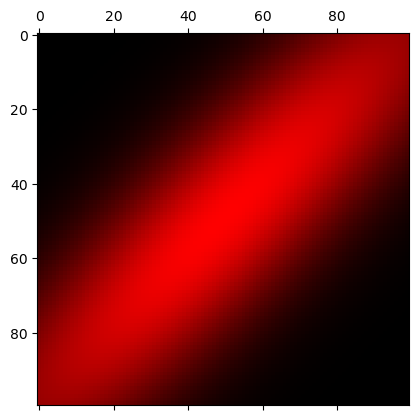

In [9]:
plt.matshow(F)